# Lab 6 - Cubic Splines
## March 13 - March 15, 2023
## Student 1 Name: $\underline{Aditya Tanna}{\hspace{3in}}$ Student 1 ID No. $\underline{202103023}{\hspace{1.5in}}$
## Student 2 Name: $\underline{Kanishk Dad}{\hspace{3in}}$ Student 2 ID No. $\underline{202103003}{\hspace{1.5in}}$
## Student 3 Name: $\underline{Vraj Thakkar}{\hspace{3in}}$ Student 3 ID No. $\underline{202103052}{\hspace{1.5in}}$
## Date of Submission: $\underline{DD/MM/YY}$
***

In [28]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `mynaturalcubicspline` that takes in two vectors $x,y$, each of size $n$, and ouputs the coefficient vector $v$ of size $4(n-1)$ of the natural cubic spline that interpolates through the given points while ensuring order-$2$ continuity at node points. The function should also plot the graph of the spline function at several intermediate values of $x$.

In [29]:
### Natural Cubic Splines
### def mynaturalcubicsplines(n):
import numpy as np
import matplotlib.pyplot as plt

def mynaturalcubicspline(x, y):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n)
    for i in range(1, n - 1):
        alpha[i] = (3/h[i])*(y[i+1]-y[i]) - (3/h[i-1])*(y[i]-y[i-1])
    
    # solving for the coefficients using tridiagonal matrix algorithm
    l = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    u[0] = z[0] = 0
    for i in range(1, n-1):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    l[n-1] = 1
    z[n-1] = 0
    c = np.zeros(n)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    for j in range(n-2, -1, -1):
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (y[j+1]-y[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
    
    # combine the coefficients into a single vector
    v = np.zeros(4*(n-1))
    for i in range(n-1):
        v[4*i] = y[i]
        v[4*i+1] = b[i]
        v[4*i+2] = c[i]
        v[4*i+3] = d[i]
    # plotting the spline function
    xs = np.linspace(x[0], x[-1], 1000)
    ys = np.zeros_like(xs)
    for i in range(n-1):
        idx = np.where(np.logical_and(xs >= x[i], xs <= x[i+1]))[0]
        dx = xs[idx] - x[i]
        ys[idx] = v[4*i] + v[4*i+1]*dx + v[4*i+2]*dx**2 + v[4*i+3]*dx**3
    plt.plot(xs, ys)
    plt.scatter(x, y)
    plt.show()
    
    return v

  

### Q.1(a) Show plots of some examples of natural cubic splines for a few set of data points. Demonstrate the invariance to shifting the $x$ points by an arbitrary constant. Is it exactly invariant or approximately invariant? Explain why.

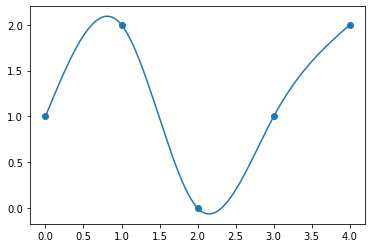

In [30]:
### Examples of Natural cubic spline fitting

x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 0, 1, 2])
#v = mynaturalcubicspline(x, y)
v = mynaturalcubicspline(x, y)





### <font color="red"> Ans 1. Write your observations/explanations here <font>
    Shifting the x points by an arbitrary constant, the spline is only approximately invariant, not exactly invariant. This is because changing the x values by a constant will change the h values(due to difference of two different machine numbers, the difference generated could have anamolies) used to compute the alpha values in the tridiagonal matrix system, which will in turn affect the spline coefficients. However, the effect of this change is relatively small, especially when the number of data points is large. 
    

***
### Q.2 Let us now use splines to model curves in $\mathbb{R}^2$ (in general $\mathbb{R}^n$). The curve can be now represented by a tuple of functions, each for one coordinate: $c(t) = (x(t),y(t)),t\in [a,b]$. Such a representation of the curve is called a *parametric representation*, where the parameter is the variable $t$. One way to think about this representation is to think of the functions $x,y$ as describing the  coordinates of a particle with respect to time $t$. In case, $x(a)=x(b), y(a)=y(b)$ then the curve becomes a closed curve.

### Now, for a closed curve, assume that the functions $x,y$ are cubic splines (not natural though) with respect to the parameter $t$. Assume that $t \in [-1,1]$, and that curve passes through $x_k,y_k$ at uniformly sampled values of $t$ in the given interval.

### For a *closed cubic spline curve* with $n$ given points $\{(x_k,y_k),k=0,\ldots,n-1\}$ through which the curve should pass through, how many cubic polynomials will be required. Derive the equations that arise from continuity upto order $2$ at each of the given points. 

### <font color="red"> Ans(2) : Give your answer and derivation here

For a closed cubic spline curve with $n$ given points ${(x_k,y_k),k=0,\ldots,n-1}$ through which the curve should pass through, we need $2n$ cubic polynomials to construct the curve as there are n-1 cubic polynomials required for x(t) and y(t) for all t and there will be 1 additional cubic polynomial for x(t) and y(t) so 2 more cubic polynomial are required. Each cubic polynomial will be defined in the interval $[t_{k},t_{k+1}]$, where $t_{k}$ is the uniformly sampled value of $t$ for $k=0,\ldots,n-1$.

To derive the equations that arise from continuity up to order 2 at each of the given points, we need to first define the cubic polynomials in each interval $[t_{k},t_{k+1}]$ in terms of their coefficients. Let $S_{k}(t)$ be the cubic spline function in the interval $[t_{k},t_{k+1}]$. Then, we can write:

$$S_k(t) = a_k + b_k(t-t_k) + c_k(t-t_k)^2 + d_k(t-t_k)^3$$

where $a_k, b_k, c_k$
 and $d_k$ are the coefficients of the cubic polynomial in the interval $[t_{k},t_{k+1}]$.

We need the observations of continuity upto an order of 2, for which we need the following

At each of the given $n$ points, the curve is continuous. This means that the splines for adjacent intervals must  always meet at every point (i.e. $n$). That is,
$$S_{k-1}(t_k) = S_k(t_k) \quad \text{for } k = 1,\ldots,n-1$$

Also, the first derivative of the curve is continuous at every point $n$. This means that the first derivative of the splines for all adjacent intervals should match with each of the $n$ points. That is,
$$S_{k-1}'(t_k) = S_k'(t_k) \quad \text{for } k = 1,\ldots,n-1$$  

At each of the given $n$ points, the second derivative of the curve is continuous. This means that the second derivative of the cubic splines for adjacent intervals must match at each of the $n$ points. That is,
$$S_{k-1}''(t_k) = S_k''(t_k) \quad \text{for } k = 1,\ldots,n-1$$

We are subject to extra restrictions on the end points since the curve is closed, which are as follows: 

Because the curve is periodic, it must terminate where it started.
As a result, the cubic splines' first and second derivatives at the first and end locations must coincide.
That is, 
$$S_{n-1}(t_0) = S_{n-1}(t_{n-1}) \quad \text{and} \quad S_{n-1}'(t_0) = S_{n-1}'(t_n)$$

$$S_{n-1}''(t_0) = S_{n-1}''(t_n) \quad $$

where $t_0=a$ and $t_n=b$.



### Q.2(a) Write a function `mycubicclosedcurve` that takes in two vectors $x,y$ each of size $n \times 1$, where $(x_k,y_k),k=1,\ldots,n$ are the points through which the parametric curve should pass through for uniformly sampled parameter on the interval $[-1,1]$. The function should return two vectors $v_x,v_y$ each corresponding to the coefficients of the spline $x(t),y(t)$ representing a closed curve satisfying the given conditions, incl. $x(-1)=x(1),y(-1)=y(1)$. Your function should also plot several intermediate points. An Example is shown below for 4 points.

<div>
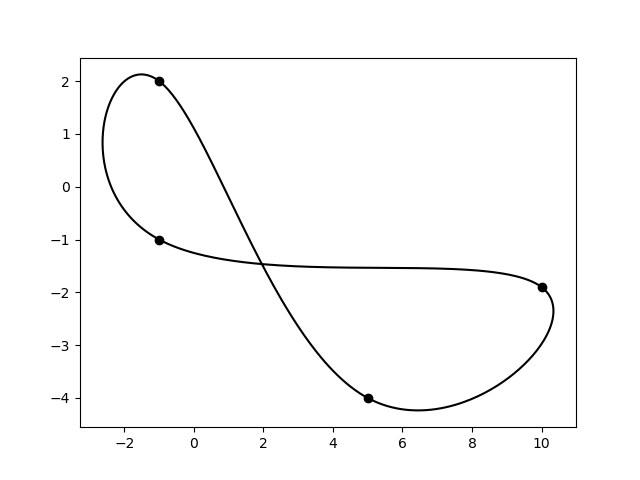
</div>

In [65]:
def find_next_indexes(x, array):
    nxt_small = None
    nxt_big = None
    for i in range(len(array)):
        if array[i] < x:
            if nxt_small is None or array[i] > array[nxt_small]:
                nxt_small = i
        elif array[i] > x:
            if nxt_big is None or array[i] <= array[nxt_big]:
                nxt_big = i
    if nxt_small == None:
        nxt_small = 0
    
    return nxt_small, nxt_big

In [75]:
# Functions that Evaluate the S(x) = P(x)_i , where i=0, 1, 2, .., n-1
def evaluate(val, coeff, data_points):
    p, p1 = find_next_indexes(val,data_points)#finding the next indices for the data points
    polynomial = coeff[p,:] # function that returns you the coefficients of the for the P(x)_i for a given value of x
    eval = (polynomial[0] + (polynomial[1] * val) + (polynomial[2] * (val**2)) + (polynomial[3] * (val**3)))    
    return eval

In [78]:
### Planar Closed Cubic Spline curve
### def mycubicclosedcurve(x,y):
def mycubicclosedcurve(x, y, n): #n being the number of data points
    matrix = np.zeros((4*n,4*n))
    y_finish = [] #taking as an empty array 
    for i in range(n):
        block_matrix = []
        x_p = x[i]
        x_p1 = x[i+1]
        y_finish = np.append(y_finish, [y[i], y[i+1], 0, 0])

        r1 = np.array([1, x_p, x_p**2, x_p**3, 0, 0, 0,0]) # n x 8 
        r2 = np.array([1, x_p1, x_p1**2, x_p1**3, 0, 0, 0,0]) # n x 8
        if(i != n-1):
            r3 = np.array([0, 1, 2*x_p1, 3*(x_p1**2), 0, -1, -2*x_p1, -3*(x_p1**2) ]) # n-1 x 8 
            r4 = np.array([0, 0, 2, 6*x_p1, 0, 0, -2, -6*x_p1 ]) # n-1 x 8

            block_matrix = np.vstack((r1, r2, r3, r4))
            matrix[4*i:4*i+4,4*i:4*i+8] = block_matrix
        else :
            r1 = r1[:4]
            r2 = r2[:4]
            block_matrix = np.vstack((r1, r2))
            matrix[4*i:4*i+2,4*i:4*i+4] = block_matrix 

    matrix[4*n-2:4*n-1,0:4] = np.array([0, 1, 2*x[0], 3*(x[0]**2)])
    matrix[4*n-2:4*n-1,4*n-4:4*n] = np.array([0, -1, -2*x[len(x) - 1], -3*(x[len(x) - 1]**2)])

  
    matrix[4*n-1:4*n,0:4] = np.array([0, 0, 2, 6*x[0] ])
    matrix[4*n-1:4*n,4*n-4:4*n] = np.array([0, 0, -2, -6*x[len(x) - 1]])


    y_finish = np.reshape(y_finish, (4*n,1))

    coefficients = np.linalg.solve(matrix, y_finish)
    coefficients_eval = np.reshape(coefficients, (len(x) - 1,4))
    return coefficients_eval




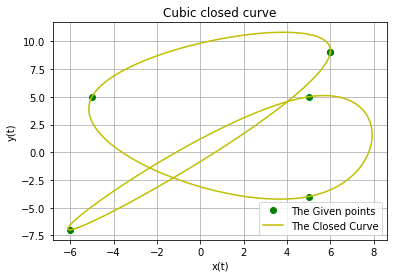

In [79]:
x = [6,-5,5,5,-6,6]
y = [9,5,-4,5,-7,9]
n = len(x)
o = np.linspace(-1, 1, len(x))

# 
v_x = mycubicclosedcurve(o, x, n-1)
v_y = mycubicclosedcurve(o, y, n-1)
v_x = np.reshape(v_x, (n - 1, 4))
v_y = np.reshape(v_y, (n - 1, 4))


points = np.linspace(-1, 1, 1000)
lst1 = []
lst2 = []
#taking two empty lists
for i in range(len(t_x)):
    lst1 = np.append(lst1, evaluate(points[i], v_x, o))
    lst2 = np.append(lst2, evaluate(points[i], v_y, o))

plt.plot(x, y,'go', label="The Given points")
plt.plot(lst1, lst2, color='y', label="The Closed Curve")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Cubic closed curve")
plt.legend()
plt.grid()
plt.show()